<a href="https://colab.research.google.com/github/AbdulhameedSk/Machine-Learning/blob/main/Lasso_and_Ridge_for_Company_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASETS/Company_data (1).csv')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
df.shape

(200, 4)

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

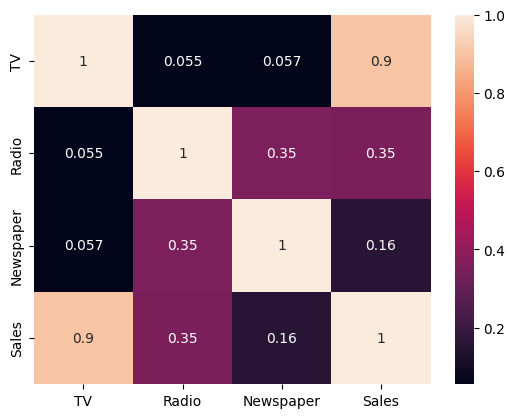

In [11]:
sns.heatmap(df.corr(),annot=True)

We see that advertisements given on TV and sales are highly correlated compared to others

In [12]:
#Taking X as First Colums
X=df.iloc[:,0]

In [13]:
#Taking y as last column
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Spllitting data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [16]:

print(X_train.shape,X_test.shape)
y_train.shape,y_test.shape
     

(140,) (60,)


((140,), (60,))

In [17]:
#To make into Arrays / Re shaping data
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [18]:
#Into 2D arrays
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [19]:
#Fitting the model
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
#Finding different types of errors
#Performing evaluation metrics based on the training data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = reg.predict(X_train)
print('performance basedd on training data')
print(f'Mean absolute error: {mean_absolute_error(y_train,y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y_train,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train,y_pred))}')
print(f'r2_score: {r2_score(y_train,y_pred)}')

performance basedd on training data
Mean absolute error: 1.81882800711975
mean_squared_error: 5.0779600089908765
RMSE: 2.253432938649579
r2_score: 0.805941153711277


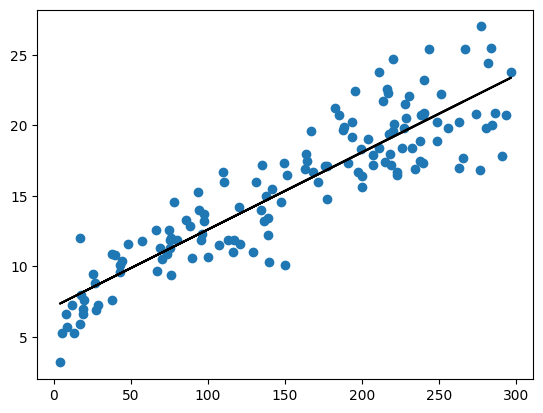

In [21]:
# fitting a straight line for the predicted and actual outputs of training data
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,c='black')

In [22]:
#Performing evaluation metrics based on the testing data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred1 = reg.predict(X_test)
print('Performance of the model based on testing data:')
print(f'MAE: {mean_absolute_error(y_test,y_pred1)}')
print(f'MSE: {mean_squared_error(y_test,y_pred1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred1))}')
print(f'R2_Score: {r2_score(y_test,y_pred1)}')

Performance of the model based on testing data:
MAE: 1.8639438916550555
MSE: 5.569539193467241
RMSE: 2.3599871172248466
R2_Score: 0.8150168765722069


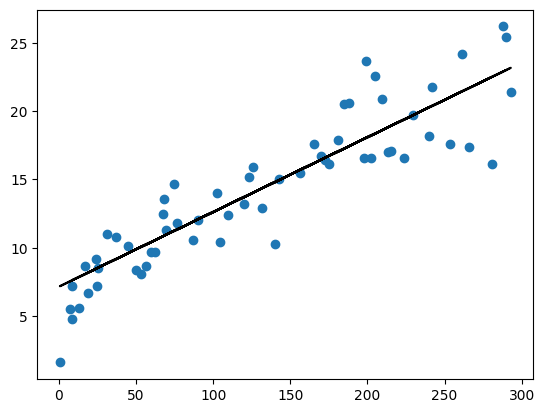

In [23]:
# fitting a straight line for the predicted and actual outputs of testing data
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred1,c='black')

In [24]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [25]:
# fitting the model i.e. making it learn using Lasso Regression algorithm
reg=Lasso(alpha=0.569)
reg.fit(X_train,y_train)

Lasso(alpha=0.569)

In [26]:
y_predict=reg.predict(X_train)
print('performance basedd on training data')
print(f'Mean absolute error: {mean_absolute_error(y_train,y_predict)}')
print(f'mean_squared_error: {mean_squared_error(y_train,y_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train,y_predict))}')
print(f'r2_score: {r2_score(y_train,y_predict)}')

performance basedd on training data
Mean absolute error: 1.8189052608314336
mean_squared_error: 5.07800599734888
RMSE: 2.253443142692728
r2_score: 0.805939396224475


In [27]:
y_predict1=reg.predict(X_test)
print('Performance of the model based on testing data:')
print(f'MAE: {mean_absolute_error(y_test,y_predict1)}')
print(f'MSE: {mean_squared_error(y_test,y_predict1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_predict1))}')
print(f'R2_Score: {r2_score(y_test,y_predict1)}')

Performance of the model based on testing data:
MAE: 1.8646948471650096
MSE: 5.572710385624786
RMSE: 2.360658888027829
R2_Score: 0.8149115506179556


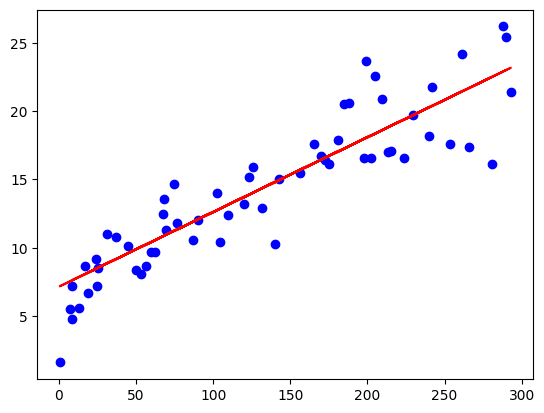

In [35]:
# fitting a straight line for the predicted and actual outputs of testing data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test,y_predict1,c='r',linestyle='solid')
plt.show()

In [28]:
reg.score(X_test,y_test)

0.8149115506179556

In [29]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [30]:
reg = Ridge(alpha=0.569)
reg.fit(X_train,y_train)

Ridge(alpha=0.569)

In [31]:
y_predict=reg.predict(X_train)
print('performance basedd on training data')
print(f'Mean absolute error: {mean_absolute_error(y_train,y_predict)}')
print(f'mean_squared_error: {mean_squared_error(y_train,y_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train,y_predict))}')
print(f'r2_score: {r2_score(y_train,y_predict)}')

performance basedd on training data
Mean absolute error: 1.8188280373215153
mean_squared_error: 5.077960008997905
RMSE: 2.2534329386511383
r2_score: 0.8059411537110084


In [32]:
#Predicting based on testing data  and performing evaluation metrics
y_predict1=reg.predict(X_test)
print('Performance of the model based on testing data:')
print(f'MAE: {mean_absolute_error(y_test,y_pred1)}')
print(f'MSE: {mean_squared_error(y_test,y_pred1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred1))}')
print(f'R2_Score: {r2_score(y_test,y_pred1)}')

Performance of the model based on testing data:
MAE: 1.8639438916550555
MSE: 5.569539193467241
RMSE: 2.3599871172248466
R2_Score: 0.8150168765722069


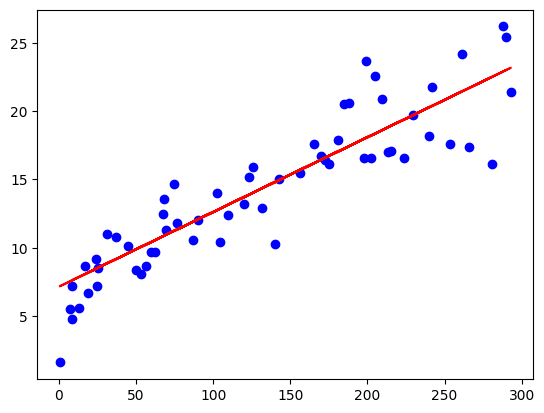

In [33]:
# fitting a straight line for the predicted and actual outputs of testing data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test,y_predict1,c='r',linestyle='solid')
plt.show()
     

In [34]:
reg.score(X_test,y_test)

0.8150168360886028